In [1]:
import os
import sys
sys.path.append('/Users/mnannan/dev/supelec/ngsa/assignments/Assignement 2 ')

from main import pipeline
from core.io.loader import *
from features.features_extractor import FeaturesExtractor
from features.processing import features_processing
from models.cross_validation import *
from plot.features_importances import plot_features_importance

from datetime import datetime

%matplotlib inline



In [2]:
train = pd.read_csv('../data/train_2019-01-12.csv')

In [3]:
test = pd.read_csv('../data/test_2019-01-12.csv')

In [4]:
selected_columns = [
    'title_overlap',
    'publication_date_diff',
    'common_authors',
    'same_journal',
    'authors_collaboration',
    'collaboration_min_distance',
    'collaboration_mean_distance',
    'writer_in_target_paper',
    'writer_collaborators',
    'writer_collaboration_min_distance',
    'writer_collaboration_mean_distance',
    'source_paper_citations',
    'target_paper_citations',
    'source_number_of_papers_cited',
    'target_number_of_papers_cited',
    'adamic_adar',
    'common_neighbors',
    'jaccard_coefficient',
    'preferential_attachment',
    'max_authors_adamic_adar',
    'max_authors_common_neighbors',
    'max_authors_jaccard_coefficient',
    'max_authors_preferential_attachment',
    'title_cosine_similarity',
    'abstract_cosine_similarity',
    'journal_cosine_similarity', 
    'source_title_target_abstract_cosimilarity',
    'source_abstract_target_title_cosimilarity',
    'pagerank_source',
    'pagerank_target'
]

x_train = features_processing(train[selected_columns]).values
x_test = features_processing(test[selected_columns]).values
y_train = train.category.values

In [7]:
from sklearn.ensemble import RandomForestClassifier

seed = 123

model_args = {
    'n_jobs': -1,
    'n_estimators': 100,
    'random_state': seed,
    'criterion': 'entropy',
    'max_features': 'log2'
}

In [ ]:
y_pred, f1_list = cross_validation(RandomForestClassifier, model_args, x_train, y_train)

In [ ]:
np.mean(f1_list)

In [5]:
from sklearn.model_selection import GridSearchCV


In [16]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'random_state': [seed],
    'criterion': ['entropy'],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [1, 3],
    'n_estimators': [100, 500],
    'max_depth': [None, 10]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, scoring='f1')

In [17]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 49.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 128.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'random_state': [123], 'criterion': ['entropy'], 'max_features': ['log2', 'sqrt'], 'min_samples_leaf': [1, 3], 'n_estimators': [100, 500], 'max_depth': [None, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

In [18]:
(grid_search.cv_results_

/Users/mnannan/.virtualenvs/supelec/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/mnannan/.virtualenvs/supelec/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/mnannan/.virtualenvs/supelec/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_

{'mean_fit_time': array([ 302.98022723, 1449.44506445,  288.75474133, 1358.46193409,
         326.68071985, 1439.74774594,  283.21992354, 1412.41321607,
         173.18847651,  859.29357862,  171.70427408,  862.46279078,
         205.15506039, 1020.42869539,  204.93303137,  867.96339979]),
 'std_fit_time': array([ 0.93270147, 13.90796791,  2.48703133, 44.83735328, 10.32769653,
         3.27744875,  0.84125962,  4.14546317,  0.33579169,  2.65066801,
         1.26638552,  1.56149141,  0.44503739,  3.50469635,  0.67771408,
        73.58205227]),
 'mean_score_time': array([ 3.76336198, 23.73924508,  4.34268742, 16.7774797 ,  3.62117615,
        17.40382009,  3.26614528, 16.28900313,  1.85477982,  9.16271696,
         1.86939425,  9.07757139,  1.87317538,  8.73121738,  1.86457562,
         5.9815712 ]),
 'std_score_time': array([0.1096132 , 2.48309205, 0.37391619, 0.52187826, 0.16599082,
        0.32706351, 0.04213364, 0.25884885, 0.02316568, 0.04732964,
        0.03247299, 0.04903022, 0.01

In [29]:
result = sorted(
    list(
        zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score'])
    ),
    key=lambda x: (x[0]['max_features'], x[0]['min_samples_leaf'], x[0]['n_estimators'])
)

In [46]:
pd.Series(list(elt[1] for elt in result), index=list(elt[0] for elt in result))\
.rename('f1') \
.sort_values(ascending=False).to_frame()


,f1
"{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500, 'random_state': 123}",0.978036
"{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 123}",0.978022
"{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 500, 'random_state': 123}",0.977875
"{'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 500, 'random_state': 123}",0.977820
"{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 100, 'random_state': 123}",0.977812
"{'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 123}",0.977702
"{'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 3, 'n_estimators': 500, 'random_state': 123}",0.977681
"{'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 3, 'n_estimators': 100, 'random_state': 123}",0.977604
"{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 123}",0.975613
"{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500, 'random_state': 123}",0.975544


###### Predict

In [48]:
model_args = grid_search.best_params_

In [54]:
rf = RandomForestClassifier(**model_args, n_jobs=-1)

In [55]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

adamic_adar                                  0.234544
jaccard_coefficient                          0.199596
common_neighbors                             0.175324
abstract_cosine_similarity                   0.074040
publication_date_diff                        0.066990
target_paper_citations                       0.038014
preferential_attachment                      0.035275
source_abstract_target_title_cosimilarity    0.032042
source_title_target_abstract_cosimilarity    0.023398
pagerank_target                              0.019975
source_number_of_papers_cited                0.015319
target_number_of_papers_cited                0.012052
pagerank_source                              0.009573
collaboration_mean_distance                  0.009392
title_cosine_similarity                      0.008267
source_paper_citations                       0.007864
writer_collaboration_mean_distance           0.006339
journal_cosine_similarity                    0.006083
max_authors_preferential_att

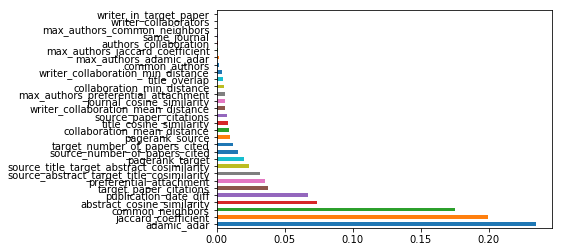

In [56]:
plot_features_importance(rf.feature_importances_, selected_columns)

In [57]:
date = datetime.now().isoformat().split(".")[0]
prediction_name = 'rf_grid_search{date}.csv'.format(date=date)
prediction_dir = '../submissions'
y_pred = rf.predict(x_test)
y_pred = pd.Series(data=y_pred).rename('category').rename_axis('id', axis='index')
y_pred.to_csv(os.path.join(prediction_dir, prediction_name), header=True)

###### Best model perfom 0.96993

In [58]:
rf2 = RandomForestClassifier(n_jobs=-1, n_estimators=500, criterion="entropy", max_features="log2", max_depth=10)


In [61]:
rf2.fit(train[selected_columns], train.category)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [60]:
date = datetime.now().isoformat().split(".")[0]
prediction_name = 'rf_bd_tunned{date}.csv'.format(date=date)
prediction_dir = '../submissions'
y_pred = rf2.predict(x_test)
y_pred = pd.Series(data=y_pred).rename('category').rename_axis('id', axis='index')
y_pred.to_csv(os.path.join(prediction_dir, prediction_name), header=True)

###### Perfom 0.96783 on the leaderboard